<a href="https://colab.research.google.com/github/Romneasek/Linear_Regression_Project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

In [2]:
data = pd.read_csv("/content/SeoulBikeData.csv")

In [3]:
print("Dimension of data dataset", data.shape)

Dimension of data dataset (8760, 14)


# Read the data

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Extracting dataframe for only 'number' datatypes

In [5]:
df = data.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Identifing missing Values

In [8]:
miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

# Constructing correlation Matrix

In [9]:
data_corr = df.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


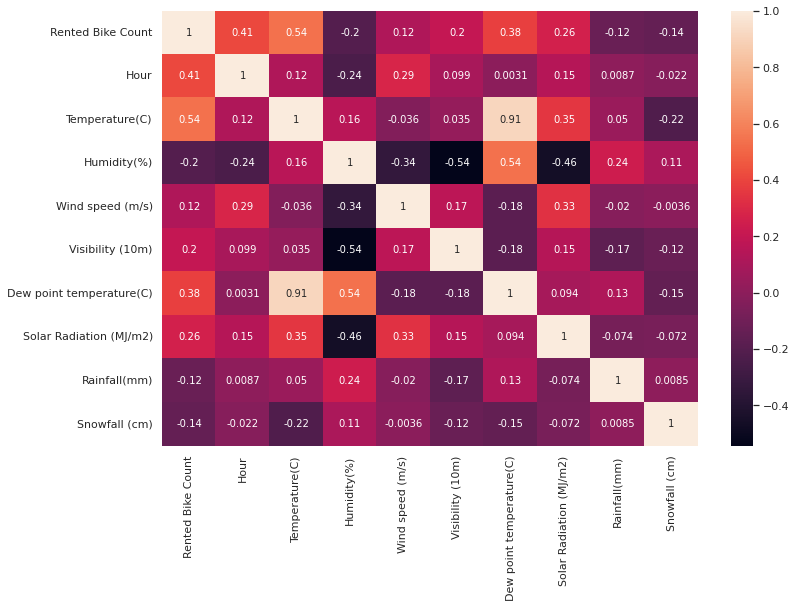

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data_corr, annot=True)
plt.show()

# model preparation

In [12]:
#splitting dataframe: 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.25)

In [14]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [15]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (6570, 9)
Dimension of train_y dataframe: (6570,)
Dimension of val_x dataframe: (2190, 9)
Dimension of val_y dataframe: (2190,)


# training the model

In [17]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))


Mean Absolute Error of linear regression: 348.249438481105
Mean Square Error of linear regression: 225565.60581507094
R_Squared Score of linear regression: -0.17433347536348198


In [21]:
val_x.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
2923,19,17.4,79,2.3,614,13.7,0.03,0.0,0.0
5657,17,34.9,51,2.2,1235,23.2,0.98,0.0,0.0
5180,20,27.1,67,2.9,1949,20.4,0.06,0.0,0.0
4886,14,31.6,25,2.3,1780,9.1,3.21,0.0,0.0
8310,6,3.8,69,0.0,1995,-1.3,0.00,0.0,0.0


# test model

In [25]:
#at this point we have trained our model
predic_test = ln_reg.predict(val_x)

submission_data = pd.DataFrame({'Pred_RBC':predic_test}, index = val_x.index)
print(submission_data)

val_y = pd.DataFrame(val_y)# converted val_y into df
val_y['Predicted'] = submission_data['Pred_RBC']# added a new column called Predicted containg predicted data

val_y

         Pred_RBC
2923   922.284546
5657  1561.709528
5180  1375.090403
4886  1407.970267
8310   257.136017
...           ...
7986   891.194509
2397   653.277973
622    579.428596
7161   746.800637
7752   313.139697

[2190 rows x 1 columns]


,Rented Bike Count,Predicted
2923,1066,922.284546
5657,1297,1561.709528
5180,2415,1375.090403
4886,1087,1407.970267
8310,419,257.136017
...,...,...
7986,1987,891.194509
2397,470,653.277973
622,213,579.428596
7161,542,746.800637


In [26]:
# Ridge (L2) Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [29]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y['Rented Bike Count'])
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 2.72859181e+01,  2.76431051e+01, -8.02215414e+00,  1.39034912e+00,
        2.88441134e-02,  3.55989722e+00, -6.94471557e+01, -5.92541440e+01,
        1.39120755e+01])

In [30]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.4762134265040312
number of feature used: 9


In [31]:
#Lasso (L1) Regression
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [33]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y['Rented Bike Count'])
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([ 2.73453260e+01,  2.74818737e+01, -7.93042288e+00,  0.00000000e+00,
        2.98447645e-02,  3.54090539e+00, -6.60876175e+01, -5.85376325e+01,
        7.91558852e+00])

In [34]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.47577187720548675
number of feature used: 8
